# Synthia's notebook to experiment with the data 

In [80]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *

## Load Datasets

In [54]:
NSDUH2021 = readInData("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt")
# display(NSDUH2021.head())

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2799) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


In [55]:
NSDUH2019 = readInData("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt")
# display(NSDUH2019.head())
NSDUH2019.head()

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2575) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,43295143,10/09/2020,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,6613.865847,40004,2
1,65095143,10/09/2020,2,99,99,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,6321.580570,40003,1
2,49405143,10/09/2020,1,99,99,22,9999,99,4,93,...,3.0,2,2,2,2,2,2,5045.607492,40008,1
3,51015143,10/09/2020,2,99,99,991,9991,91,91,91,...,1.0,2,2,2,2,2,2,2419.558820,40031,1
4,31825143,10/09/2020,2,99,99,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,575.225454,40010,2


In [56]:
NSDUH2018 = readInData("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv")
NSDUH2018.head()

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2525) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,11015143,10/08/2019,1,99,99,12,9999,99,1,20,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,86325143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,35425143,10/08/2019,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,98125143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,15945143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,1,2,1,1,2,2,6637.319591,40040,2


In [57]:
CoreTrends2021 = readInData("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv")
# display(CoreTrends2021.head())

In [58]:
CoreTrends2019 = readInData("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv")
# display(CoreTrends2019.head())

In [59]:
CoreTrends2018 = readInData("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv")
display(CoreTrends2018.head())

,respid,sample,comp,int_date,lang,cregion,state,density,usr,qs1,...,inc,party,partyln,hh1,hh3,ql1,ql1a,qc1,weight,cellweight
0,1,1,1,180103,1,1,42,5,U,,...,6,2,,5,4,1,,,1.746359,
1,2,1,1,180103,1,3,45,2,S,,...,4,3,8,2,2,2,2,,1.659764,
2,3,1,1,180103,1,1,34,5,S,,...,4,1,,1,,1,,,0.490804,
3,4,1,1,180103,1,3,24,4,S,,...,2,2,,2,2,1,,,0.947965,
4,5,1,1,180103,1,1,33,2,R,,...,7,1,,3,3,1,,,0.915959,


## Clean up data


###ADMT16 - ADMT21  : How many visits to various types of outpatient facilities for mental health

<br>AGE3: age (intervals of 2, e.g. 1 = age 12 or 13, up to age 65)
<br>IRSEX: gender 1=male, 2=female

<br>ADMT01 : AUINPYR : stayed in hospital for mental health
<br>ADMT25/ADMTREF25 : AURXYR : taken any medication for mental health

<br>YE09 : YEATNDYR : HAs attended some sort of school
<br>YE10 : YESCHFLT : how much they like going to school (1-4, 4=hated it)
<br>YE23b : YEPRBSLV : participated in self-esteem group

<br>NERVE30 : DSTNRV30 : How often felt nervous (1-5, 5=never) in past 30 days
<br>HOPE30 : DSTHOP30 : How often feel hopeless
<br>NOCHR30 : DSTCHR30 : How often felt depressed
<br>DOWN30 : DSTNGD30 : How often feeling down/worthless
<br>WORST30 : DSTWORST : In past year has there been a worse month than current (1-2, 2=No)
<br>DSNERV1 : DSTNRV12 : in WORST30 month, how often felt nervous
<br>DSHOPE : DSTHOP12 : In WORST30 month, how often felt hopeless
<br>DSNOCHR : DSTCHR12 : in WORST30 month, how often felt depressed
<br>DSDOWN : DSTNGD12 : in WORST30 month, how often felt worthless

<br>LICONCEN : IMPCONCN : Difficulty concentrating in their worst month (1-4, 4= severe)
<br>LIGOOUT1 : IMPGOUT : Difficulty leaving house
<br>LISTRAN1 : IMPPEOP : Difficulty dealing with less known people
<br>LISOC1 : IMPSOC : Difficulty participating in social activites
<br>LISOC2 : IMPSOCM : Did mental health problems keep from participating socially

<br>SUI01 : SUICTHNK : Think about suicide in past year
<br>SUI02 : SUIPLANYR :  Plans for suicide

<br>ASC21 : ADDPREV : Long periods of feeling sad


In [60]:
cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]

NSDUH2021_wantedCols = getWantedColumns(NSDUH2021, cols)

In [61]:
#Removed "SUIPLANYR" because its not present
cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]

NSDUH2019_wantedCols = getWantedColumns(NSDUH2019, cols)
NSDUH2019_wantedCols.columns

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')

In [62]:
NSDUH2018_wantedCols = getWantedColumns(NSDUH2018, cols)


Core trends variables:

web1a    -	Twitter
web1b    -	Instagram
web1c    -	Facebook 
web1d    -	Snapchat
web1e    -	YouTube

How often use social media, 1-5, 5=less often

sns2a    -	Twitter
sns2b    -	Instagram
sns2c    -	Facebook 
sns2d    -	Snapchat
sns2e    -	YouTube

gender  - gender
age     - age



In [63]:
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]

CoreTrends2021_wantedCols = getWantedColumns(CoreTrends2021, CoreTrends2021Cols)

In [64]:
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2019_wantedCols = getWantedColumns(CoreTrends2019, CoreTrends2019Cols)

In [65]:
# CoreTrends2018Cols = ["respid", "web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2018_wantedCols = getWantedColumns(CoreTrends2018, CoreTrends2018Cols)

In [66]:
print(NSDUH2018_wantedCols.columns)
print(CoreTrends2018_wantedCols.columns)

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')
Index(['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'sns2a', 'sns2b', 'sns2c',
       'sns2d', 'sns2e', 'sex', 'age'],
      dtype='object')


Map the ages from CoreTrends to match the age ranges in NSDUH for simplicity

In [ ]:
merged_2018 = convertAndMergeCoreTrendstoNSDUH(CoreTrends2018_wantedCols, NSDUH2018_wantedCols)

In [67]:
# age_mapping_CoreToNSDUH2018 = {
#     12: 1,
#     13: 2,
#     14: 3,
#     15: 4,
#     16: 5,
#     17: 6,
#     18: 7,
#     19: 8,
#     20: 9,
#     21: 10,
#     22: 11,
#     23: 11,
#     24: 12,
#     25: 12,
#     **{age: 13 for age in range(26, 30)},
#     **{age: 14 for age in range(30, 35)},
#     **{age: 15 for age in range(35, 50)},
#     **{age: 16 for age in range(50, 65)},
#     **{age: 17 for age in range(65, 100)}
# }

# #Might need to remap this later to match 2018/2019 but I'll worry abot that later
# age_mapping_CoreToNSDUH2021 = {
#     12: 1,
#     13: 1,
#     14: 2,
#     15: 2,
#     16: 3,
#     17: 3,
#     18: 4,
#     19: 4,
#     20: 4,
#     21: 5,
#     22: 5,
#     23: 5,
#     24: 6,
#     25: 6,
#     **{age: 7 for age in range(26, 29)},
#     **{age: 8 for age in range(30, 34)},
#     **{age: 9 for age in range(35, 49)},
#     **{age: 10 for age in range(50, 64)},
#     **{age: 11 for age in range(65, 100)}
# }

# CoreTrends2018_wantedCols['age'] = CoreTrends2018_wantedCols['age'].map(age_mapping_CoreToNSDUH2018)
# CoreTrends2019_wantedCols['age'] = CoreTrends2019_wantedCols['age'].map(age_mapping_CoreToNSDUH2018)
# CoreTrends2021_wantedCols['age'] = CoreTrends2021_wantedCols['age'].map(age_mapping_CoreToNSDUH2021)

# print(CoreTrends2018_wantedCols['age'])

0       14
1       17
2       17
3       16
4       16
        ..
1997    17
1998    17
1999    15
2000    17
2001    14
Name: age, Length: 2002, dtype: int64


In [68]:
# merged_2018 = pd.merge(CoreTrends2018_wantedCols, NSDUH2018_wantedCols, left_on='age', right_on='AGE2', how='right')

# print(merged_2018.head())
# print(merged_2018.columns)

  web1a web1b web1c web1d web1e sns2a sns2b sns2c sns2d sns2e  ...  DSTHOP12  \
0     2     2     1     2     2                 3              ...        99   
1     2     2     1     2     1                 3           2  ...        99   
2     1     2     1     2     1     2           1           3  ...        99   
3                                                              ...        99   
4     2     2     1     2     1                 5           3  ...        99   

   DSTCHR12  DSTNGD12  IMPCONCN  IMPGOUT  IMPPEOP  IMPSOC  IMPSOCM  SUICTHNK  \
0        99        99        99       99       99      99       99         2   
1        99        99        99       99       99      99       99         2   
2        99        99        99       99       99      99       99         2   
3        99        99        99       99       99      99       99         2   
4        99        99        99       99       99      99       99         2   

   ADDPREV  
0        2  
1        2  

In [69]:
# merged_2018 = merged_2018.apply(pd.to_numeric, errors='coerce')
# merged_2018 = merged_2018[merged_2018 < 85]

In [70]:
merged_2018.head()

,web1a,web1b,web1c,web1d,web1e,sns2a,sns2b,sns2c,sns2d,sns2e,...,DSTHOP12,DSTCHR12,DSTNGD12,IMPCONCN,IMPGOUT,IMPPEOP,IMPSOC,IMPSOCM,SUICTHNK,ADDPREV
0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
1,2.0,2.0,1.0,2.0,1.0,NaN,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2,1.0,2.0,1.0,2.0,1.0,2.0,NaN,1.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
4,2.0,2.0,1.0,2.0,1.0,NaN,NaN,5.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0


In [77]:
merged_2018['average_SM_use'] = merged_2018[['sns2a', 'sns2b', 'sns2c','sns2d']].sum(axis=1, skipna=True)


/var/folders/gb/6lz7ywcj7bv70m1184dmt2ym0000gn/T/ipykernel_49106/2490430954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_2018['average_SM_use'] = merged_2018[['sns2a', 'sns2b', 'sns2c','sns2d']].sum(axis=1, skipna=True)


In [78]:
merged_2018 = merged_2018.dropna(subset=['average_SM_use', 'AGE2'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '12'),
  Text(6, 0, '13'),
  Text(7, 0, '14'),
  Text(8, 0, '15'),
  Text(9, 0, '16'),
  Text(10, 0, '17')])

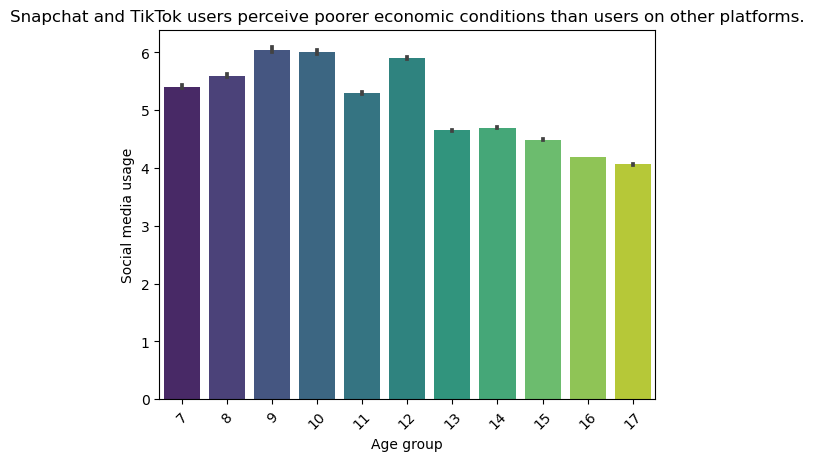

In [79]:
sns.barplot(data=merged_2018, x='AGE2', y='average_SM_use',palette='viridis')
plt.xlabel("Age group")
plt.ylabel("Social media usage")
plt.title("Snapchat and TikTok users perceive poorer economic conditions than users on other platforms.")
plt.xticks(rotation=45)